In [ ]:
# 한글 폰트를 사용하기 위한 툴
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from scipy import stats
from scipy.stats import f_oneway
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import datetime
from sklearn.metrics import mean_squared_error , r2_score
import statsmodels.api as sm
import scipy
from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn.model_selection import ParameterGrid
from statsmodels.graphics.tsaplots import plot_pacf


import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def smape(a, f):
    a=a.values
    f=f.values
    score=(1/len(a))*(np.sum(2*np.abs(f-a)/(np.abs(a)+np.abs(f)))*100)
    return score

In [ ]:
# 한글 폰트 꺠짐 방지를 위해 나눔폰트를 설치 후, 런타임을 다시 시작해줍니다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 94 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 데이터를 불러온다.
df = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/airpolution/final_final.csv', parse_dates = ['ds'])

In [ ]:
df = df.drop(['동작구','강남구'], axis = 1)

In [ ]:
# prophet에 맞춰주기 위해서 
train = df[df['ds'] < '2021-07-10']
test = df[(df['ds'] >= '2021-07-10') & (df['ds'] < '2021-07-12')]

In [ ]:
test

,광진구,노원구,마포구,성동구,송파구,용산구,중구,중랑구,ds
39,23.0,24.0,24.0,24.0,25.0,24.0,27.0,26.0,2021-07-10
40,33.0,32.0,30.0,31.0,31.0,29.0,36.0,35.0,2021-07-11


In [ ]:
# 결측치를 확인한다.
print(train.isnull().sum(),test.isnull().sum())

광진구    0
노원구    0
마포구    0
성동구    0
송파구    0
용산구    0
중구     0
중랑구    0
ds     0
dtype: int64 광진구    0
노원구    0
마포구    0
성동구    0
송파구    0
용산구    0
중구     0
중랑구    0
ds     0
dtype: int64


## 통계적 지표로 확인해보기

In [ ]:
from scipy.stats import shapiro

# 정규성 검정하기
final_list = []
for i in df.columns[:-1]:
  if df[i].isnull().sum().sum() == 0:
  # 정규성검정을 한다.
    test_stat, p_val = shapiro(df[i])
    # p_value가 0.05이상인 값들을 뽑는다.
    if p_val > 0.05:
      # 값을 출력한다.
      print(f'{i} and {p_val}')

      final_list.append(i)

광진구 and 0.051622532308101654
노원구 and 0.08813834190368652
마포구 and 0.05745401233434677
성동구 and 0.0882747694849968
송파구 and 0.053232889622449875
용산구 and 0.1733751893043518
중구 and 0.0609566867351532
중랑구 and 0.05482148006558418


In [ ]:
# adf test를 위한 함수
def adf_test(df, i):
    name=df.columns[i]
    df=df.iloc[:, i]

    result = adfuller(df.values)
    print(name)
    print('ADF Statistics : %f' %result[0])
    print('p-value %f' % result[1])
    print('Critical values : ')
    for key,value in result[4].items():
        print('\t%s : %.3f' %(key,value))

In [ ]:
# adf 확인하기
for i in range(len(df.columns[:-1])):
    print(adf_test(df, i))

광진구
ADF Statistics : -5.429593
p-value 0.000003
Critical values : 
	1% : -3.546
	5% : -2.912
	10% : -2.594
None
노원구
ADF Statistics : -5.626695
p-value 0.000001
Critical values : 
	1% : -3.546
	5% : -2.912
	10% : -2.594
None
마포구
ADF Statistics : -5.394435
p-value 0.000003
Critical values : 
	1% : -3.546
	5% : -2.912
	10% : -2.594
None
성동구
ADF Statistics : -5.452370
p-value 0.000003
Critical values : 
	1% : -3.546
	5% : -2.912
	10% : -2.594
None
송파구
ADF Statistics : -5.642636
p-value 0.000001
Critical values : 
	1% : -3.546
	5% : -2.912
	10% : -2.594
None
용산구
ADF Statistics : -5.266269
p-value 0.000006
Critical values : 
	1% : -3.546
	5% : -2.912
	10% : -2.594
None
중구
ADF Statistics : -5.385152
p-value 0.000004
Critical values : 
	1% : -3.546
	5% : -2.912
	10% : -2.594
None
중랑구
ADF Statistics : -5.770085
p-value 0.000001
Critical values : 
	1% : -3.546
	5% : -2.912
	10% : -2.594
None


In [ ]:
# kpss를 확인하는 함수
def kpss_test(df, i):
    name=df.columns[i]
    df=df.iloc[:, i]
    statistic, p_value, n_lags, critical_values = kpss(df.values)


    print(name)
    print(f'KPSS statistic : {statistic}')
    print(f'p-value : {p_value}')
    print(f'num lags : {n_lags}')
    for key,value in critical_values.items():
        print(f'   {key} : {value}')

In [ ]:
for i in range(len(df.columns[:-1])):
    print(kpss_test(df, i))

광진구
KPSS statistic : 0.39739324170474205
p-value : 0.07827877512726636
num lags : 11
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
노원구
KPSS statistic : 0.3881215080575918
p-value : 0.08227521204414145
num lags : 11
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
마포구
KPSS statistic : 0.407856241552258
p-value : 0.07376886139988878
num lags : 11
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
성동구
KPSS statistic : 0.41179162724052054
p-value : 0.07207257446529287
num lags : 11
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
송파구
KPSS statistic : 0.3916947071749884
p-value : 0.08073504001078087
num lags : 11
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
용산구
KPSS statistic : 0.38760951655696185
p-value : 0.0824958980357923
num lags : 11
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
None
중구
KPSS statistic : 0.41395649715340704
p-value : 0.07113944088215214
num lags : 11
   10% : 0.347
   5% : 0.46

In [ ]:
df

,광진구,노원구,마포구,성동구,송파구,용산구,중구,중랑구,ds
0,39.0,36.0,34.0,37.0,40.0,35.0,40.0,38.0,2021-06-01
1,50.0,47.0,49.0,49.0,51.0,46.0,57.0,51.0,2021-06-02
2,36.0,30.0,31.0,33.0,37.0,30.0,34.0,35.0,2021-06-03
3,25.0,25.0,25.0,23.0,24.0,25.0,28.0,25.0,2021-06-04
4,40.0,38.0,41.0,39.0,39.0,42.0,45.0,39.0,2021-06-05
...,...,...,...,...,...,...,...,...,...
56,26.0,22.0,26.0,27.0,27.0,27.0,31.0,26.0,2021-07-27
57,31.0,28.0,31.0,31.0,32.0,32.0,34.0,32.0,2021-07-28
58,48.0,44.0,45.0,47.0,53.0,47.0,52.0,50.0,2021-07-29
59,32.0,31.0,24.0,28.0,34.0,28.0,30.0,33.0,2021-07-30


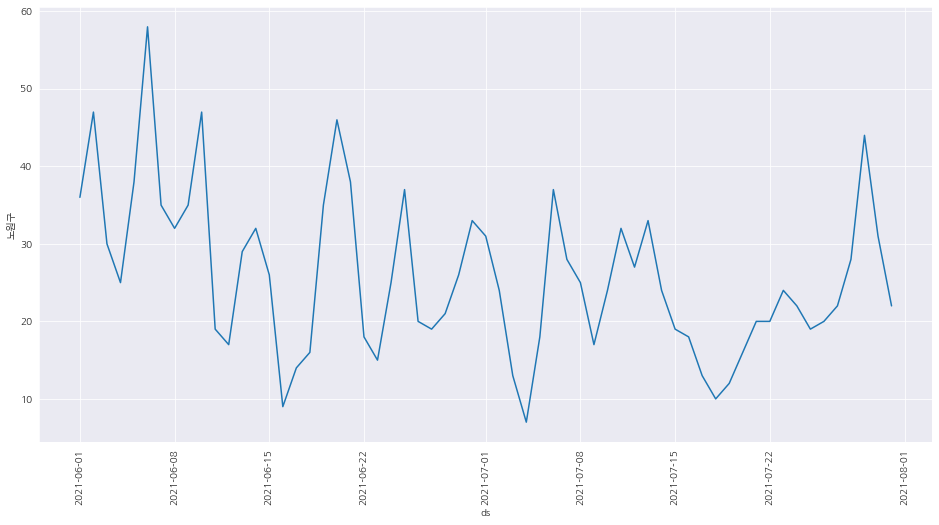

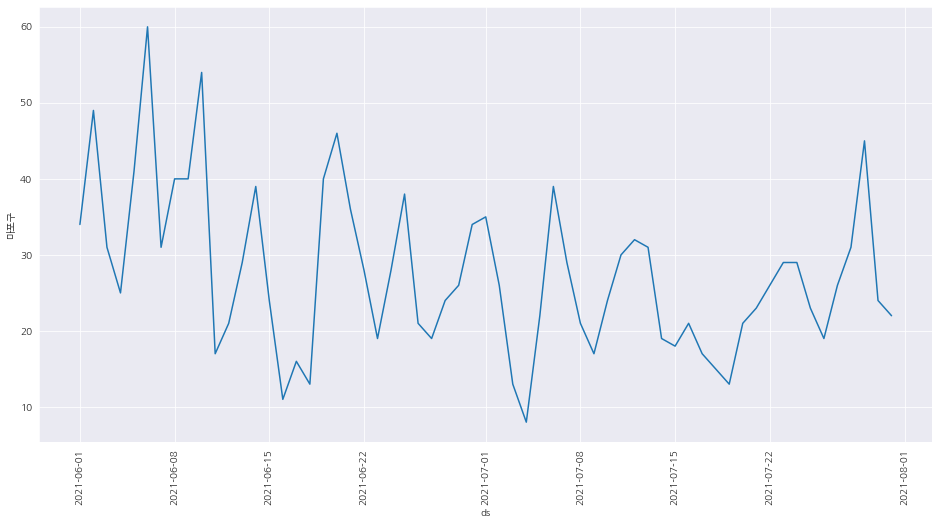

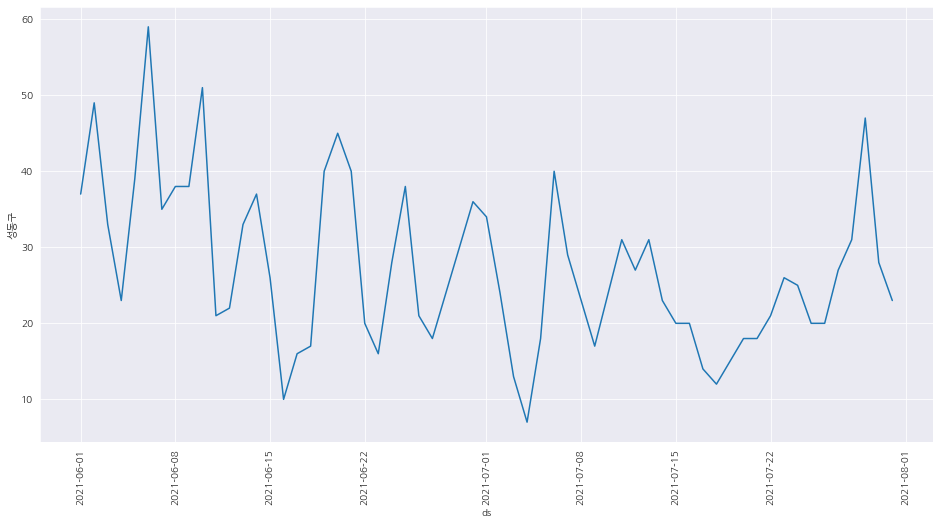

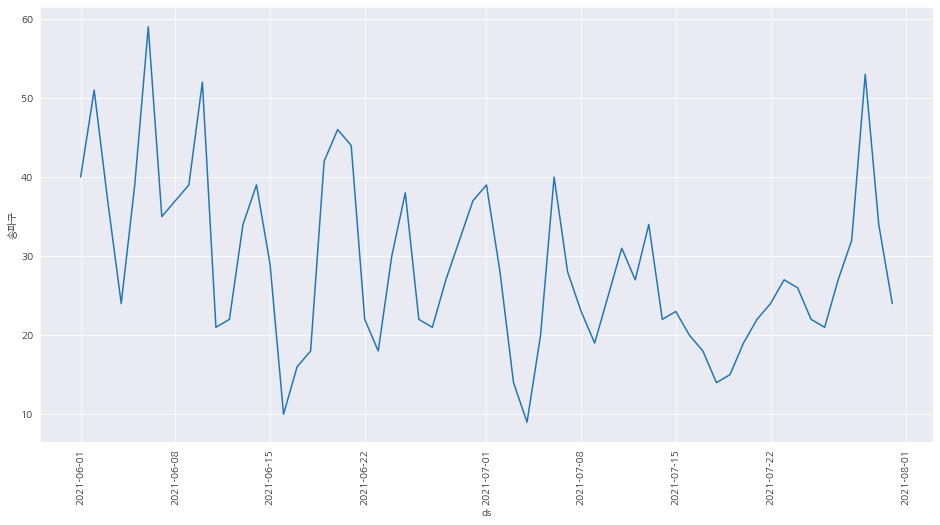

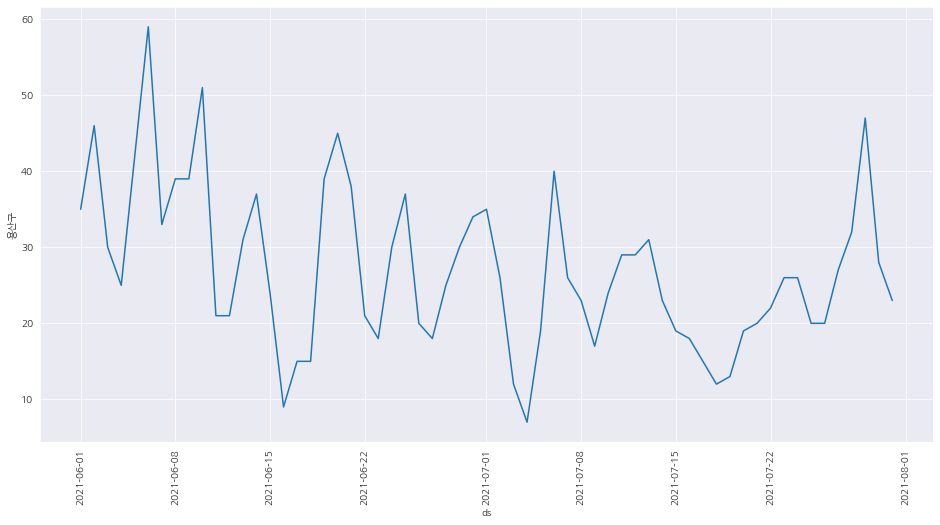

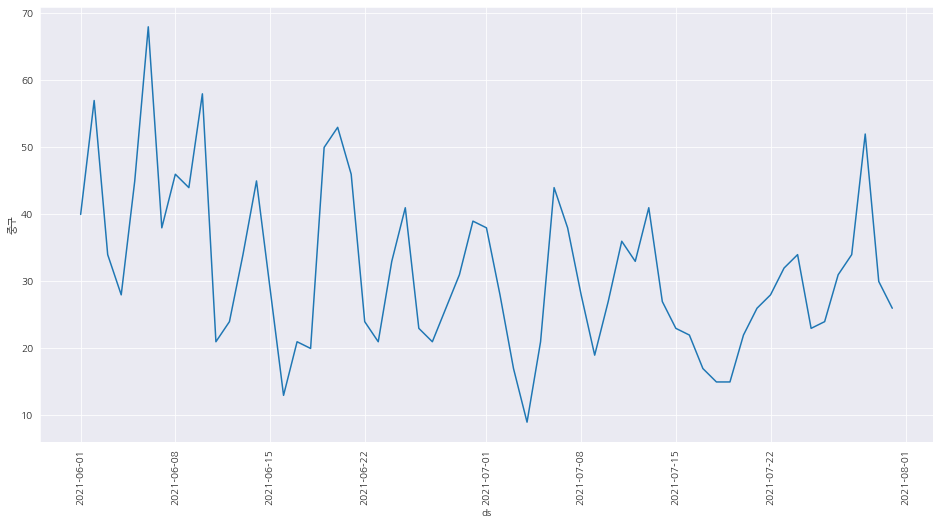

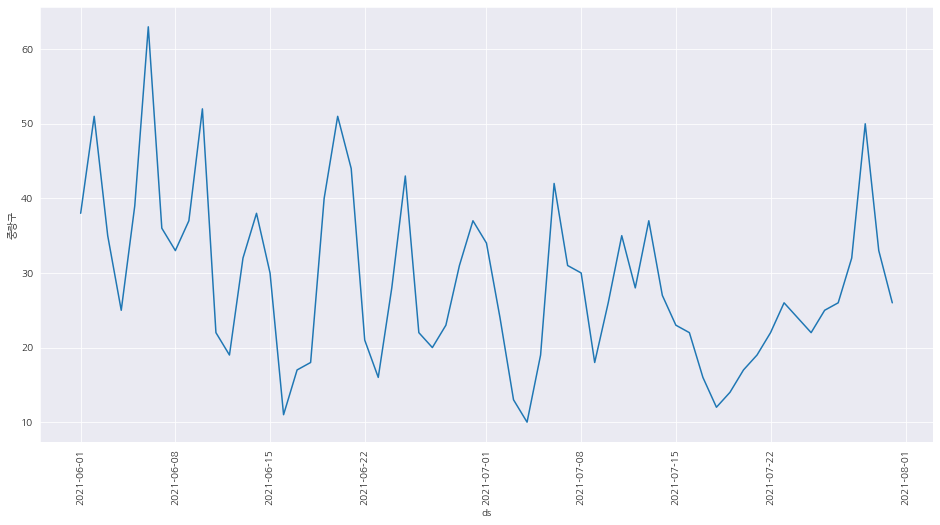

In [ ]:
# 그래프로 각 구별 확인해보기
sns.set_style("darkgrid")

for i in range(1,8):
  plt.figure(figsize = (16,8))
  plt.rcParams['font.family'] = 'NanumGothic'
  sns.lineplot(data=df, x="ds", y=df.iloc[:, i])
  plt.xticks(rotation = 90)
  plt.show()

In [ ]:
### Error analysis
def stationarity_adf_test(Y_Data, Target_name):
    if len(Target_name) == 0:
        Stationarity_adf = pd.Series(sm.tsa.stattools.adfuller(Y_Data)[0:4],
                                     index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
        for key, value in sm.tsa.stattools.adfuller(Y_Data)[4].items():
            Stationarity_adf['Critical Value(%s)'%key] = value
            Stationarity_adf['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Y_Data)[5]
            Stationarity_adf = pd.DataFrame(Stationarity_adf, columns=['Stationarity_adf'])
    else:
        Stationarity_adf = pd.Series(sm.tsa.stattools.adfuller(Y_Data[Target_name])[0:4],
                                     index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
        for key, value in sm.tsa.stattools.adfuller(Y_Data[Target_name])[4].items():
            Stationarity_adf['Critical Value(%s)'%key] = value
            Stationarity_adf['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Y_Data[Target_name])[5]
            Stationarity_adf = pd.DataFrame(Stationarity_adf, columns=['Stationarity_adf'])
    return Stationarity_adf

def stationarity_kpss_test(Y_Data, Target_name):
    if len(Target_name) == 0:
        Stationarity_kpss = pd.Series(sm.tsa.stattools.kpss(Y_Data)[0:3],
                                      index=['Test Statistics', 'p-value', 'Used Lag'])
        for key, value in sm.tsa.stattools.kpss(Y_Data)[3].items():
            Stationarity_kpss['Critical Value(%s)'%key] = value
            Stationarity_kpss = pd.DataFrame(Stationarity_kpss, columns=['Stationarity_kpss'])
    else:
        Stationarity_kpss = pd.Series(sm.tsa.stattools.kpss(Y_Data[Target_name])[0:3],
                                      index=['Test Statistics', 'p-value', 'Used Lag'])
        for key, value in sm.tsa.stattools.kpss(Y_Data[Target_name])[3].items():
            Stationarity_kpss['Critical Value(%s)'%key] = value
            Stationarity_kpss = pd.DataFrame(Stationarity_kpss, columns=['Stationarity_kpss'])
    return Stationarity_kpss

광진구


56    26.0
57    31.0
58    48.0
59    32.0
60    22.0
Name: 광진구, dtype: float64

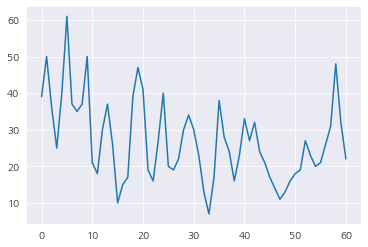

,Stationarity_adf
Test Statistics,-5.429593
p-value,0.000003
Used Lag,1.000000
Used Observations,59.000000
Critical Value(1%),-3.546395
Maximum Information Criteria,338.171256


,Stationarity_kpss
Test Statistics,0.397393
p-value,0.078279
Used Lag,11.000000
Critical Value(10%),0.347000


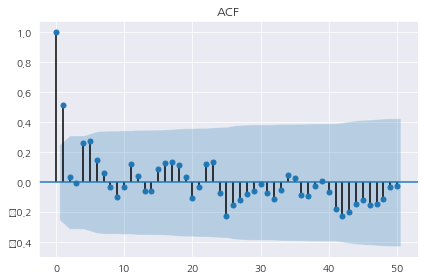

노원구


56    22.0
57    28.0
58    44.0
59    31.0
60    22.0
Name: 노원구, dtype: float64

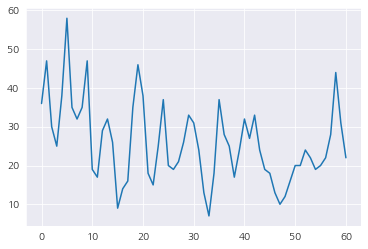

,Stationarity_adf
Test Statistics,-5.626695
p-value,0.000001
Used Lag,1.000000
Used Observations,59.000000
Critical Value(1%),-3.546395
Maximum Information Criteria,328.460440


,Stationarity_kpss
Test Statistics,0.388122
p-value,0.082275
Used Lag,11.000000
Critical Value(10%),0.347000


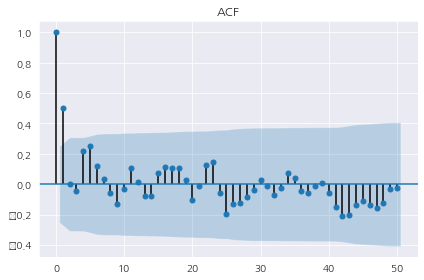

마포구


56    26.0
57    31.0
58    45.0
59    24.0
60    22.0
Name: 마포구, dtype: float64

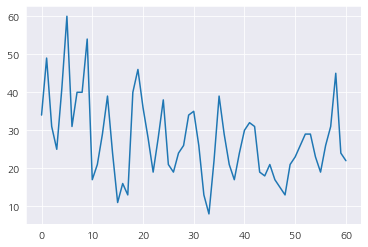

,Stationarity_adf
Test Statistics,-5.394435
p-value,0.000003
Used Lag,1.000000
Used Observations,59.000000
Critical Value(1%),-3.546395
Maximum Information Criteria,332.168597


,Stationarity_kpss
Test Statistics,0.407856
p-value,0.073769
Used Lag,11.000000
Critical Value(10%),0.347000


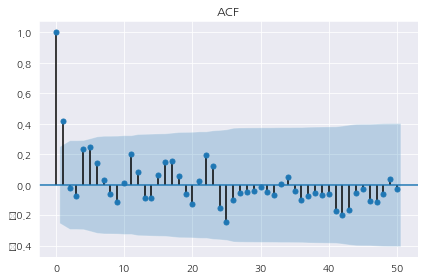

성동구


56    27.0
57    31.0
58    47.0
59    28.0
60    23.0
Name: 성동구, dtype: float64

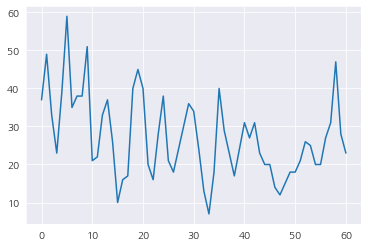

,Stationarity_adf
Test Statistics,-5.452370
p-value,0.000003
Used Lag,1.000000
Used Observations,59.000000
Critical Value(1%),-3.546395
Maximum Information Criteria,334.261324


,Stationarity_kpss
Test Statistics,0.411792
p-value,0.072073
Used Lag,11.000000
Critical Value(10%),0.347000


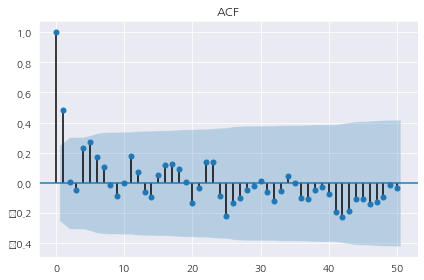

송파구


56    27.0
57    32.0
58    53.0
59    34.0
60    24.0
Name: 송파구, dtype: float64

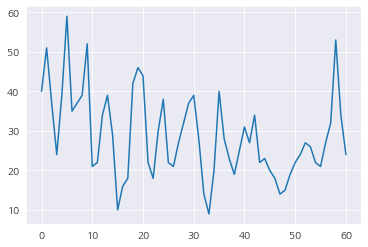

,Stationarity_adf
Test Statistics,-5.642636
p-value,0.000001
Used Lag,1.000000
Used Observations,59.000000
Critical Value(1%),-3.546395
Maximum Information Criteria,340.422165


,Stationarity_kpss
Test Statistics,0.391695
p-value,0.080735
Used Lag,11.000000
Critical Value(10%),0.347000


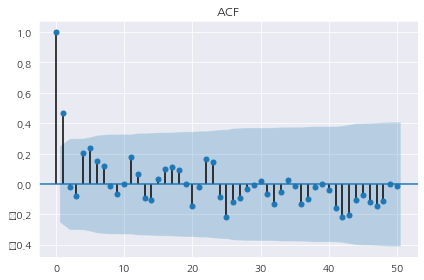

용산구


56    27.0
57    32.0
58    47.0
59    28.0
60    23.0
Name: 용산구, dtype: float64

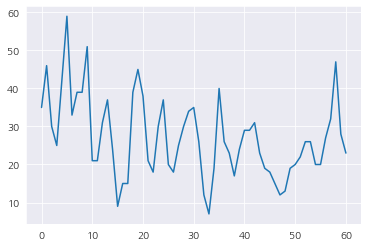

,Stationarity_adf
Test Statistics,-5.266269
p-value,0.000006
Used Lag,1.000000
Used Observations,59.000000
Critical Value(1%),-3.546395
Maximum Information Criteria,333.287979


,Stationarity_kpss
Test Statistics,0.387610
p-value,0.082496
Used Lag,11.000000
Critical Value(10%),0.347000


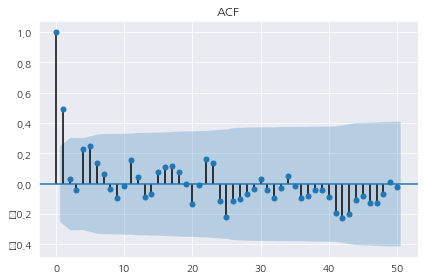

중구


56    31.0
57    34.0
58    52.0
59    30.0
60    26.0
Name: 중구, dtype: float64

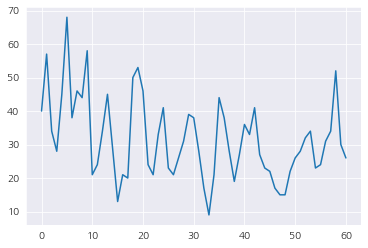

,Stationarity_adf
Test Statistics,-5.385152
p-value,0.000004
Used Lag,1.000000
Used Observations,59.000000
Critical Value(1%),-3.546395
Maximum Information Criteria,348.627158


,Stationarity_kpss
Test Statistics,0.413956
p-value,0.071139
Used Lag,11.000000
Critical Value(10%),0.347000


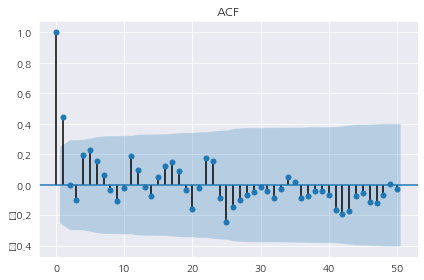

중랑구


56    26.0
57    32.0
58    50.0
59    33.0
60    26.0
Name: 중랑구, dtype: float64

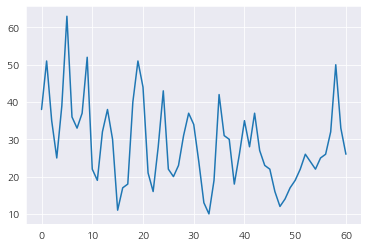

,Stationarity_adf
Test Statistics,-5.770085e+00
p-value,5.417776e-07
Used Lag,1.000000e+00
Used Observations,5.900000e+01
Critical Value(1%),-3.546395e+00
Maximum Information Criteria,3.460651e+02


,Stationarity_kpss
Test Statistics,0.381492
p-value,0.085133
Used Lag,11.000000
Critical Value(10%),0.347000


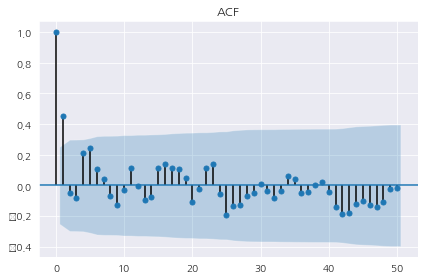

In [ ]:
for i in range(0,8):
    col=df.iloc[:, i]
    name=df.columns[i]
    print(name)
    display(col.tail())
    plt.plot(col.index, col.values)
    plt.show()
    
    display(stationarity_adf_test(col.values, []))
    display(stationarity_kpss_test(col.values, []))
    sm.graphics.tsa.plot_acf(col.values, lags=50, use_vlines=True, title='ACF')
    plt.tight_layout()
    plt.show()

In [ ]:
df

,광진구,노원구,마포구,성동구,송파구,용산구,중구,중랑구,ds
0,39.0,36.0,34.0,37.0,40.0,35.0,40.0,38.0,2021-06-01
1,50.0,47.0,49.0,49.0,51.0,46.0,57.0,51.0,2021-06-02
2,36.0,30.0,31.0,33.0,37.0,30.0,34.0,35.0,2021-06-03
3,25.0,25.0,25.0,23.0,24.0,25.0,28.0,25.0,2021-06-04
4,40.0,38.0,41.0,39.0,39.0,42.0,45.0,39.0,2021-06-05
...,...,...,...,...,...,...,...,...,...
56,26.0,22.0,26.0,27.0,27.0,27.0,31.0,26.0,2021-07-27
57,31.0,28.0,31.0,31.0,32.0,32.0,34.0,32.0,2021-07-28
58,48.0,44.0,45.0,47.0,53.0,47.0,52.0,50.0,2021-07-29
59,32.0,31.0,24.0,28.0,34.0,28.0,30.0,33.0,2021-07-30


## PACF

<Figure size 1152x576 with 0 Axes>

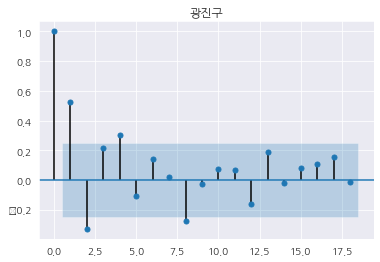

<Figure size 1152x576 with 0 Axes>

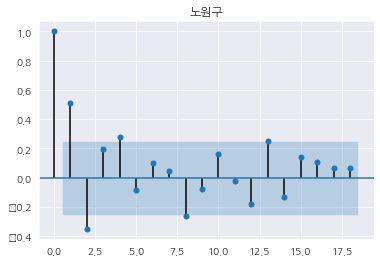

<Figure size 1152x576 with 0 Axes>

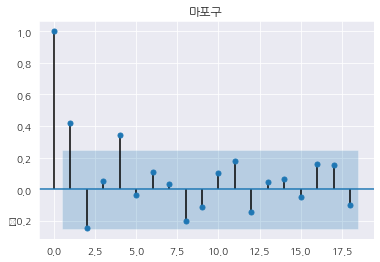

<Figure size 1152x576 with 0 Axes>

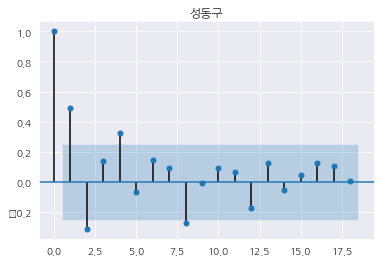

<Figure size 1152x576 with 0 Axes>

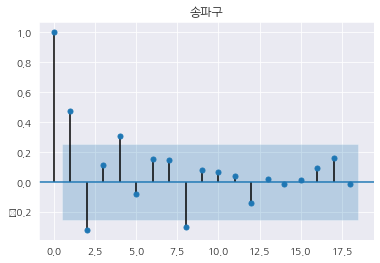

<Figure size 1152x576 with 0 Axes>

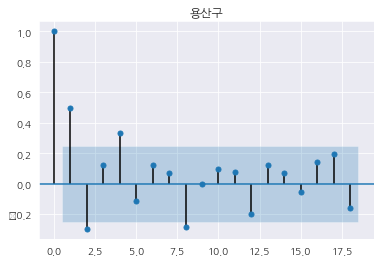

<Figure size 1152x576 with 0 Axes>

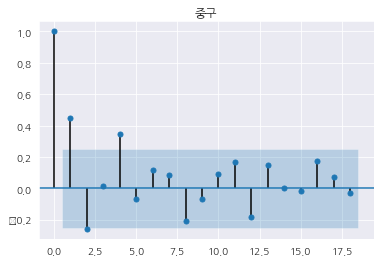

<Figure size 1152x576 with 0 Axes>

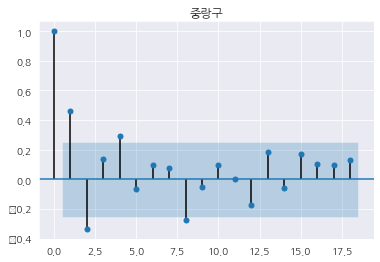

In [ ]:
for i in df.columns[:-1]:
  plt.figure(figsize = (16,8))
  plot_pacf(df[i])
  plt.title(f'{i}')
  plt.show()

## Separate seasonality and Trend from our series

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_result(df):
    for i in range(0,6):
        y=df.iloc[:, i]
        name=df.columns[i]
        print(name)
        result = seasonal_decompose(y, model='multiplicative')
        plt.rcParams['font.family'] = 'NanumGothic'
        result.plot()
        plt.show()

In [ ]:
df_1=df.set_index('ds')

In [ ]:
df_1

,광진구,노원구,마포구,성동구,송파구,용산구,중구,중랑구
ds,,,,,,,,
2021-06-01,39.0,36.0,34.0,37.0,40.0,35.0,40.0,38.0
2021-06-02,50.0,47.0,49.0,49.0,51.0,46.0,57.0,51.0
2021-06-03,36.0,30.0,31.0,33.0,37.0,30.0,34.0,35.0
2021-06-04,25.0,25.0,25.0,23.0,24.0,25.0,28.0,25.0
2021-06-05,40.0,38.0,41.0,39.0,39.0,42.0,45.0,39.0
...,...,...,...,...,...,...,...,...
2021-07-27,26.0,22.0,26.0,27.0,27.0,27.0,31.0,26.0
2021-07-28,31.0,28.0,31.0,31.0,32.0,32.0,34.0,32.0
2021-07-29,48.0,44.0,45.0,47.0,53.0,47.0,52.0,50.0


광진구


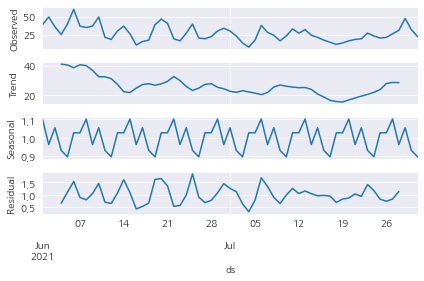

노원구


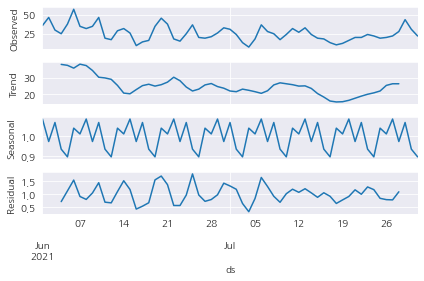

마포구


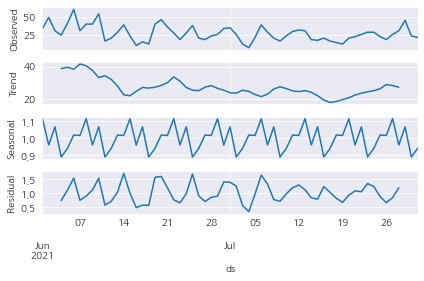

성동구


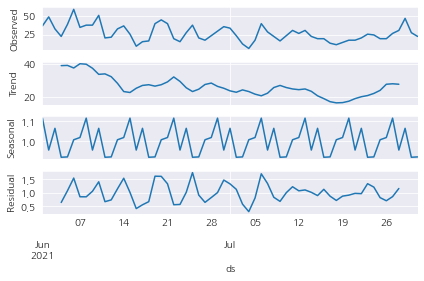

송파구


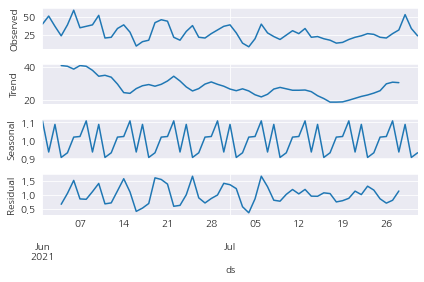

용산구


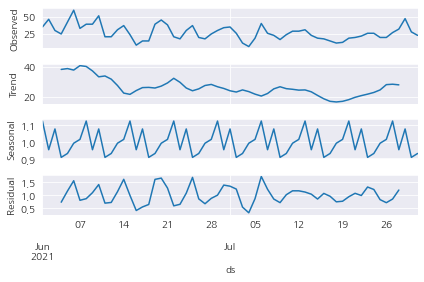

In [ ]:
seasonal_result(df_1)

# ARIMA (p,d,q) 찾기

In [ ]:
def arima(df, a,b,c):
    model=ARIMA(df, (a,b,c))
    model_fit=model.fit()
    print(model_fit.summary())
    plt.rcParams['font.family'] = 'NanumGothic'
    model_fit.plot_predict(dynamic=False)
    plt.show()

In [ ]:
train.index = train['ds']
test.index = test['ds']

In [ ]:
def arima_result(train, test, i, p, d, q):
    y=train.iloc[:, i]
    name=train.columns[i]
    model = ARIMA(y,(p,d,q))
    model_fit=model.fit()
    full_forecast = model_fit.forecast(steps=test.shape[0])
    forecast = pd.DataFrame(full_forecast[0], index=test.index, columns=[name])
    y_1=pd.DataFrame(y.values, index=y.index, columns=[name])
    t1=test.iloc[:, i]
    t2=pd.DataFrame(t1.values, index=t1.index, columns=[name] )
    smape_score=smape(t2, forecast)
    mse=mean_squared_error(t2, forecast)
    rmse=np.sqrt(mse)
    r2score=r2_score(t2, forecast)
    print(name)
    print("smape_score", smape_score)
    print("rmse", rmse)
    print("r2_score", r2score)

    plt.plot(test.iloc[:, i], cols = 'orange')
    plt.plot(forecast, cols = 'blue')
    plt.xticks(test.index)
    plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

def my_auto_arima(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p{p} d{d} q{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df.head(3)

In [ ]:
for i in range(0,8):
    y=df_1.iloc[:, i]
    name=df_1.columns[i]
    print(name)
    auto_df=my_auto_arima(y, [3,3,3])
    print(auto_df)

광진구
       order         AIC
22  p2 d2 q2  440.935204
18  p2 d1 q1  442.470574
19  p2 d1 q2  444.391909
노원구
       order         AIC
17  p2 d0 q2  431.420806
19  p2 d1 q1  433.681239
20  p2 d1 q2  435.577572
마포구
       order         AIC
18  p2 d1 q1  447.544268
5   p0 d1 q2  448.278517
19  p2 d1 q2  449.462097
성동구
       order         AIC
23  p2 d2 q2  440.295643
19  p2 d1 q1  440.813005
20  p2 d1 q2  442.812261
송파구
       order         AIC
24  p2 d2 q2  443.293080
20  p2 d1 q1  443.968366
21  p2 d1 q2  445.949558
용산구
       order         AIC
23  p2 d2 q2  441.056216
19  p2 d1 q1  441.062675
5   p0 d1 q2  442.739372
중구
       order         AIC
20  p2 d1 q1  461.275686
5   p0 d1 q2  462.603001
21  p2 d1 q2  463.037140
중랑구
       order         AIC
17  p2 d0 q2  447.234205
19  p2 d1 q1  449.051299
5   p0 d1 q2  450.992225


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2021-06-01 to 2021-07-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   광진구     61 non-null     float64
 1   노원구     61 non-null     float64
 2   마포구     61 non-null     float64
 3   성동구     61 non-null     float64
 4   송파구     61 non-null     float64
 5   용산구     61 non-null     float64
 6   중구      61 non-null     float64
 7   중랑구     61 non-null     float64
dtypes: float64(8)
memory usage: 4.3 KB


광진구
                             ARIMA Model Results                              
Dep. Variable:                  D.광진구   No. Observations:                   60
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -216.235
Method:                       css-mle   S.D. of innovations              8.782
Date:                Tue, 03 Aug 2021   AIC                            442.471
Time:                        15:41:33   BIC                            452.942
Sample:                    06-02-2021   HQIC                           446.567
                         - 07-31-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2154      0.230     -0.934      0.354      -0.667       0.236
ar.L1.D.광진구     0.5304      0.189      2.814      0.007       0.161       0.900
ar.L2.D.광진구    -0.4232      0.145     -2.918

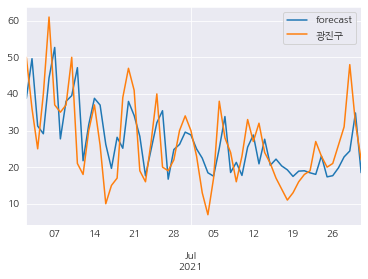

In [ ]:
# 광진구 확인해 보기
y=df_1.iloc[:, 0]
name=df_1.columns[0]
print(name)
arima(y, 2, 1, 1)

In [ ]:
test['노원구']

ds
2021-07-10    24.0
2021-07-11    32.0
Name: 노원구, dtype: float64

In [ ]:
test.index

DatetimeIndex(['2021-07-10', '2021-07-11'], dtype='datetime64[ns]', name='ds', freq=None)

In [ ]:
test

,광진구,노원구,마포구,성동구,송파구,용산구,중구,중랑구,ds
ds,,,,,,,,,
2021-07-10,23.0,24.0,24.0,24.0,25.0,24.0,27.0,26.0,2021-07-10
2021-07-11,33.0,32.0,30.0,31.0,31.0,29.0,36.0,35.0,2021-07-11


광진구
smape_score 5.351954788154875
rmse 2.132693160445102
r2_score 0.8180647953356273


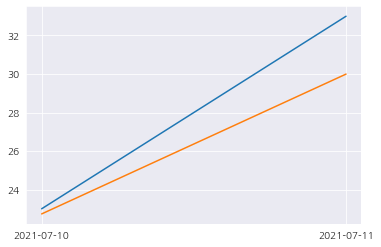

In [ ]:
arima_result(train, test, 0, 2,0,0)

노원구
                             ARIMA Model Results                              
Dep. Variable:                 D2.노원구   No. Observations:                   59
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -217.580
Method:                       css-mle   S.D. of innovations              9.246
Date:                Tue, 03 Aug 2021   AIC                            445.159
Time:                        15:30:06   BIC                            455.547
Sample:                    06-03-2021   HQIC                           449.214
                         - 07-31-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0205      0.049      0.419      0.677      -0.076       0.117
ar.L1.D2.노원구    -0.0039      0.119     -0.033      0.974      -0.236       0.228
ar.L2.D2.노원구    -0.4501      0.120     -

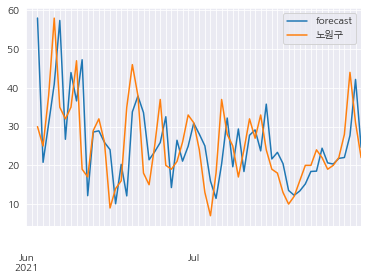

In [ ]:
# 성동구 확인하기
y=df_1.iloc[:, 1]
name=df_1.columns[1]
print(name)
arima(y, 2, 2, 1)

노원구
smape_score 10.017122426912827
rmse 2.860512582580128
r2_score 0.48859173530629785


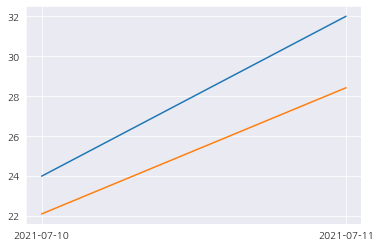

In [ ]:
arima_result(train, test, 1, 2,0,0)

In [ ]:
df_1.index

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
               '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20',
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
               '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
               '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06',
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10',
               '2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14',
               '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18',
               '2021-07-19', '2021-07-20', '2021-07-21', '2021-07-22',
               '2021-07-23', '2021-07-24', '2021-07-25', '2021-07-26',
      

마포구
                              ARMA Model Results                              
Dep. Variable:                    마포구   No. Observations:                   61
Model:                     ARMA(2, 0)   Log Likelihood                -223.124
Method:                       css-mle   S.D. of innovations              9.359
Date:                Tue, 03 Aug 2021   AIC                            454.249
Time:                        15:25:53   BIC                            462.692
Sample:                    06-01-2021   HQIC                           457.558
                         - 07-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.4842      1.646     16.696      0.000      24.258      30.711
ar.L1.마포구      0.5084      0.124      4.106      0.000       0.266       0.751
ar.L2.마포구     -0.2361      0.127     -1.861     

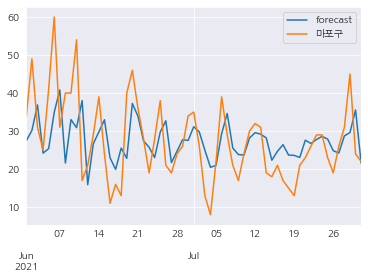

In [ ]:
# 마포구 확인하기
y=df_1.iloc[:, 2]
name=df_1.columns[2]
print(name)
arima(y, 2, 0,0)

마포구
smape_score 5.249855812830407
rmse 1.4644831573358466
r2_score 0.7616987868755145


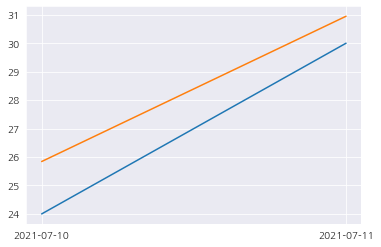

In [ ]:
arima_result(train, test, 2, 2,0,0)

성동구
                              ARMA Model Results                              
Dep. Variable:                    성동구   No. Observations:                   61
Model:                     ARMA(2, 1)   Log Likelihood                -220.217
Method:                       css-mle   S.D. of innovations              8.912
Date:                Tue, 03 Aug 2021   AIC                            450.433
Time:                        15:25:54   BIC                            460.988
Sample:                    06-01-2021   HQIC                           454.570
                         - 07-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.2177      1.748     15.570      0.000      23.792      30.644
ar.L1.성동구      0.5207      0.253      2.061      0.044       0.025       1.016
ar.L2.성동구     -0.2490      0.169     -1.474     

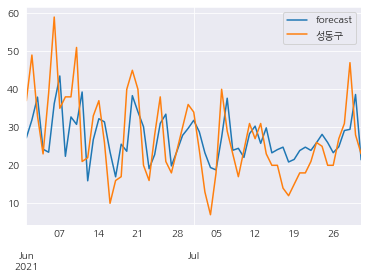

In [ ]:
# 노원구 확인하기
y=df_1.iloc[:, 3]
name=df_1.columns[3]
print(name)
arima(y, 2, 0, 1)

성동구
smape_score 1.203483375186197
rmse 0.37577819236269633
r2_score 0.9884727142975204


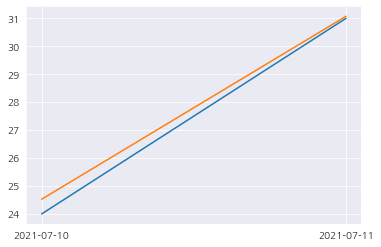

In [ ]:
arima_result(train, test, 3, 2,0,0)

송파구
                             ARIMA Model Results                              
Dep. Variable:                  D.송파구   No. Observations:                   60
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -216.984
Method:                       css-mle   S.D. of innovations              8.696
Date:                Tue, 03 Aug 2021   AIC                            443.968
Time:                        15:25:55   BIC                            454.440
Sample:                    06-02-2021   HQIC                           448.064
                         - 07-31-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2195      0.079     -2.792      0.007      -0.374      -0.065
ar.L1.D.송파구     0.5497      0.120      4.597      0.000       0.315       0.784
ar.L2.D.송파구    -0.3631      0.122     -2.982

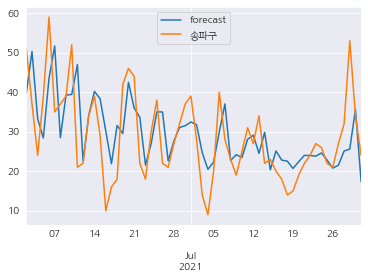

In [ ]:
# 마포구 확인하기
y=df_1.iloc[:, 4]
name=df_1.columns[4]
print(name)
arima(y, 2, 1, 1)

송파구
smape_score 7.6868983794611125
rmse 2.222253124717601
r2_score 0.4512878944092066


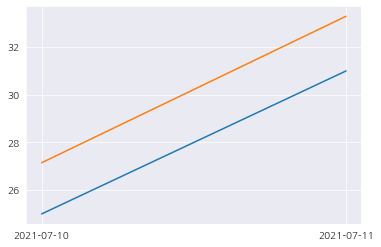

In [ ]:
arima_result(train, test, 4, 2,0,0)

용산구
                              ARMA Model Results                              
Dep. Variable:                    용산구   No. Observations:                   61
Model:                     ARMA(2, 1)   Log Likelihood                -219.770
Method:                       css-mle   S.D. of innovations              8.848
Date:                Tue, 03 Aug 2021   AIC                            449.541
Time:                        15:25:56   BIC                            460.095
Sample:                    06-01-2021   HQIC                           453.677
                         - 07-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0438      1.766     15.317      0.000      23.583      30.504
ar.L1.용산구      0.5301      0.259      2.048      0.045       0.023       1.037
ar.L2.용산구     -0.2371      0.170     -1.391     

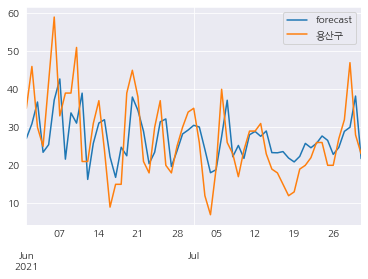

In [ ]:
# 중랑구 확인하기
y=df_1.iloc[:, 5]
name=df_1.columns[5]
print(name)
arima(y, 2, 0, 1)

용산구
smape_score 2.4366741611844747
rmse 0.8691478370301725
r2_score 0.8791331259817237


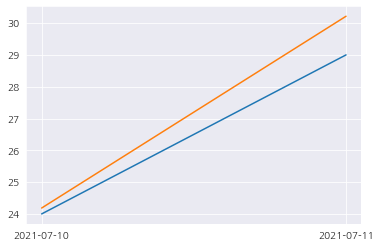

In [ ]:
arima_result(train, test, 5, 2,0,0)

중구
                             ARIMA Model Results                              
Dep. Variable:                  D2.중구   No. Observations:                   59
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -233.626
Method:                       css-mle   S.D. of innovations             12.159
Date:                Tue, 03 Aug 2021   AIC                            477.252
Time:                        15:25:57   BIC                            487.640
Sample:                    06-03-2021   HQIC                           481.307
                         - 07-31-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0161      0.064      0.250      0.803      -0.110       0.142
ar.L1.D2.중구    -0.1351      0.125     -1.078      0.286      -0.381       0.110
ar.L2.D2.중구    -0.3175      0.130     -2.439 

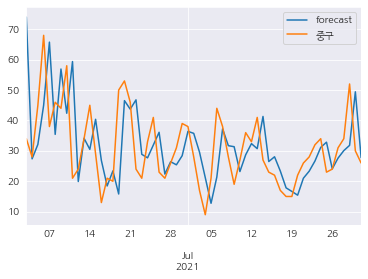

In [ ]:
# 용산구 확인하기
y=df_1.iloc[:, 6]
name=df_1.columns[6]
print(name)
arima(y, 2, 2, 1)

중구
smape_score 2.712334563590995
rmse 0.834469168701531
r2_score 0.9656128990857569


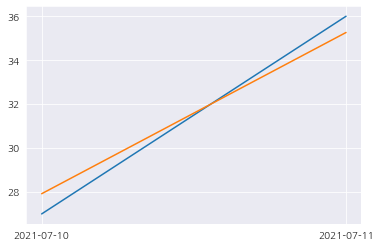

In [ ]:
arima_result(train, test, 6, 2,0,0)

중랑구
                             ARIMA Model Results                              
Dep. Variable:                  D.중랑구   No. Observations:                   60
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -219.526
Method:                       css-mle   S.D. of innovations              9.069
Date:                Tue, 03 Aug 2021   AIC                            449.051
Time:                        15:25:59   BIC                            459.523
Sample:                    06-02-2021   HQIC                           453.147
                         - 07-31-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2106      0.080     -2.621      0.011      -0.368      -0.053
ar.L1.D.중랑구     0.5386      0.119      4.518      0.000       0.305       0.772
ar.L2.D.중랑구    -0.3692      0.121     -3.055

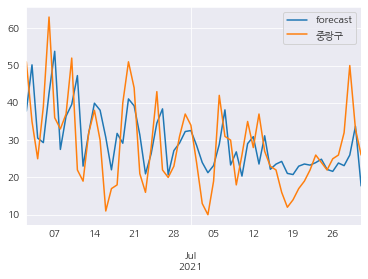

In [ ]:
# 광진구 확인하기
y=df_1.iloc[:, 7]
name=df_1.columns[7]
print(name)
arima(y, 2, 1, 1)

중랑구
smape_score 8.444864377404901
rmse 2.5049757280659097
r2_score 0.6901282272494156


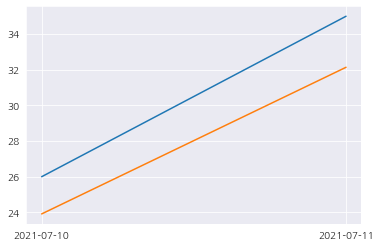

In [ ]:
arima_result(train, test, 7, 2,0,0)

# prophet(폐기)

In [ ]:
def prophet_predict(answer2):
    answer3=answer2.iloc[0, -7:]
    answer4=np.array(answer3.values)
    answer5=answer4.reshape(-1,1)
    answer6=pd.DataFrame(answer5)
    predict=round(answer6, 1)
    return predict

In [ ]:
def test_result(a, f):
    a=a.reset_index()
    name=a.columns[2]
    result=pd.concat([a,f], axis=1)
    result.drop(['index'], axis=1, inplace=True)
    result=result.rename(columns={name:'실제값', 0:'예측값'})
    return result

In [ ]:
def score(answer2, test, i):
    name=test.columns[i]
    answer3=answer2.iloc[0, -7:]
    answer4=np.array(answer3.values)
    answer5=answer4.reshape(-1,1)
    answer6=pd.DataFrame(answer5)
    predict=round(answer6, 1)
    t1=test.iloc[:, i]
    actual=pd.DataFrame(t1.values, index=t1.index, columns=[name] )
    smape_score=smape(actual, predict)
    mse=mean_squared_error(actual, predict)
    rmse=np.sqrt(mse)
    r2score=r2_score(actual, predict)
    print('smape:', smape_score)
    print("mse :", mse)
    print('rmse: ', rmse)
    print("r2_score", r2score)

In [ ]:
answer=[]
name=train.columns[0]
fb_1=train[['ds']]
fb_2=train.iloc[:, 0]
fb_3=pd.DataFrame(fb_2)
fb_4=fb_3.rename(columns={name:'y'})
fb_5=pd.concat([fb_1, fb_4], axis=1)
fb_5 = fb_5.reset_index(drop = True)
# fb_5.drop('ds', axis = 1, inplace =True)
model=Prophet()
model.fit(fb_5, algorithm='LBFGS')
future=model.make_future_dataframe(periods=7, freq='D')
forecast=model.predict(future)
pred=forecast['yhat']
answer.append(pred)
answer2=pd.DataFrame(answer)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
plot_plotly(model, forecast)

In [ ]:
f=prophet_predict(answer2)
a=test[['ds','중구']] 

In [ ]:
answer2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
yhat,41.11328,39.130362,40.218093,33.702724,34.329975,40.387872,38.499515,37.067649,35.084731,36.172462,29.657093,30.284344,36.342241,34.453885,33.022018,31.039101,32.126832,25.611487,26.238761,32.296682,30.408814,28.977435,26.995006,28.083224,21.568343,22.196082,28.254467,26.366598,24.93522,22.95279,24.041009,17.526128,18.153867,24.212252,22.324383,20.893004,18.910575,19.998794,13.483913,14.111651,20.170037,18.282168,16.850789,14.86836,15.956578,9.441698


# 등분산 검정

- 등분산 검정에서 가장 많이 활용되는 것으로 레빈의 검정(Levene's Test)

- H0 : 분산이 같다.
- H1 : 분산이 다르다

In [ ]:
# 등분산성 가정
import scipy.stats as stats
for i in df.columns[:-1]:
  for j in df.columns[:-1]:
    if i != j:
      p_val = stats.levene(df[i],df[j])
      if p_val[1] > 0.05:
        print(f'{i} and {j} and {p_val[1]}')

광진구 and 노원구 and 0.49926478740429325
광진구 and 마포구 and 0.5582126010130966
광진구 and 성동구 and 0.754279310908654
광진구 and 송파구 and 0.8238242268350164
광진구 and 용산구 and 0.6336890637699772
광진구 and 중구 and 0.6535439878839682
광진구 and 중랑구 and 0.9599332216389119
노원구 and 광진구 and 0.49926478740429325
노원구 and 마포구 and 0.9359964486898203
노원구 and 성동구 and 0.7173727463040457
노원구 and 송파구 and 0.6471742029533384
노원구 and 용산구 and 0.8380547490288132
노원구 and 중구 and 0.2752660511483612
노원구 and 중랑구 and 0.5450991521956274
마포구 and 광진구 and 0.5582126010130966
마포구 and 노원구 and 0.9359964486898203
마포구 and 성동구 and 0.7822769747942065
마포구 and 송파구 and 0.7114260109814482
마포구 and 용산구 and 0.9042503117332918
마포구 and 중구 and 0.3169277397273545
마포구 and 중랑구 and 0.6038068246824566
성동구 and 광진구 and 0.754279310908654
성동구 and 노원구 and 0.7173727463040457
성동구 and 마포구 and 0.7822769747942065
성동구 and 송파구 and 0.9261530684332413
성동구 and 용산구 and 0.872329868082117
성동구 and 중구 and 0.4554284018091981
성동구 and 중랑구 and 0.7997361216196375
송파구 and 광진구 and 0.8238242

## ANOVA 검정

- H0 : 평균의 차이가 없다.
- H1 : 평균의 차이가 있다.

In [ ]:
# ANOVA를 통해서 평균에 차이가 있는지 확인한다.
fvalue, pvalue = stats.f_oneway(df['중구'], df['성동구'], df['송파구'], df['노원구'], df['마포구'], df['중랑구'], df['용산구'], df['광진구'])
print(fvalue, pvalue)

1.551468548536558 0.14781507421511975


## AR(Auto-Regressive)
다중 회귀 모델 : 목표 예상 변수(forecast variable)의 선형조합을 이용하여 관심 있는 변수를 예측

자기 회귀 모델 : 변수의 과거값의 선형 조합을 이용하여 관심 있는 변수를 예측, 자기 자신에 대한 변수의 회귀라는 의미.

## MA(Moving Average)
2개 이상의 연속된 데이터 값의 평균을 연속적으로 계산해내는 평균화 방법.

통계에서 이동 평균은 전체 데이터 집합의 여러 하위 집합에 대한 일련의 평균을 만들어 데이터 요소를 분석하는데 사용되는 계산.

금융에서 이동 평균(MA)은 기술 분석에 일반적으로 사용되는 주식지표.

각 시점의 데이터가 최근 과거 값에 대한 '오차'항으로 구성된 함수로 표현된 과정에 의존함. 이때 오차항은 서로 독립적

In [ ]:
len(df)

61